In [66]:
%matplotlib inline

import xarray as xr
import intake
import numpy as np
import matplotlib.pyplot as plt
# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 
import pylab as plt
# %matplotlib inline 
# from mpl_toolkits import basemap
import scipy.io
import math
import mpl_toolkits as basemap
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("/glade/u/home/pmongwe/cmip6hack-ocean-bgc/catalogs/pangeo-cmip6.json")
# col

In [12]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,day,pr,gn,NaN,v20190702,20150101-20551231,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,hfls,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,prsn,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,va,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,tas,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...


In [115]:
pwd

'/glade/u/home/pmongwe/cmip6hack-ocean-bgc_v1'

In [14]:
# import pprint 
# uni_dict = col.unique(['experiment_id', 'table_id'])
# pprint.pprint(uni_dict, compact=True)

In [15]:
cat = col.search(experiment_id=['historical', 'hist-bgc'], table_id='Omon',member_id ='r1i1p1f1', grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
33179,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,NaN,v20181129,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
33180,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,thetaoga,gn,NaN,v20181129,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
33181,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,sos,gn,NaN,v20181129,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
33182,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,soga,gn,NaN,v20181129,185001-201412,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
33183,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,thkcello,gn,NaN,v20181129,191001-191912,/glade/collections/cmip/CMIP6/CMIP/BCC/BCC-ESM...
...,...,...,...,...,...,...,...,...,...,...,...,...
560478,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,evs,gn,NaN,v20190815,190001-190912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
560479,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,umo,gn,NaN,v20190815,199001-199912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
560480,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,umo,gn,NaN,v20190815,198001-198912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
560481,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,umo,gn,NaN,v20190815,197001-197912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...


In [16]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
# pprint.pprint(uni_dict, compact=True)

In [17]:
models = set(uni_dict['source_id']['values']) # all the models

for variable_id in ['fgo2', 'fgco2']: #'tos','fgco2abio','fgco2nat','tos','sos','hfds'
    query = dict(variable_id=variable_id, experiment_id = 'historical', table_id='Omon', 
              grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['NorESM2-LM', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'MIROC-ES2L', 'CanESM5']

In [18]:
# cat.to_dataset_dict?

In [20]:
variables = ['fgo2', 'fgco2','tos','sos','o2','areacello']
cat = col.search(variable_id= variables,experiment_id='historical', table_id=['Omon','Ofx'], 
                      grid_label='gn', member_id='r1i1p1f1', source_id=models) #,'hfds'
# cat.to_dataset_dict()

In [24]:
variables = ['fgo2', 'fgco2','tos','sos','spco2','areacello']
dsets = {}
for variable in variables:
    cat = col.search(variable_id= variable,experiment_id='historical', table_id=['Omon','Ofx'], 
                      grid_label='gn', member_id='r1i1p1f1', source_id=models) #,'hfds'
    dsets[variable] = cat.to_dataset_dict()
    
# dsets


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 3 group(s)

xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 3 group(s)

xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are 

In [26]:
dsets['fgo2'].keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Omon.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn', 'CMIP.NCC.NorESM2-LM.historical.Omon.gn'])

In [27]:
lat_dict = {
    'CMIP.CCCma.CanESM5.historical.Omon.gn': 'latitude',
    'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn': 'nav_lat',
    'CMIP.NCC.NorESM2-LM.historical.Omon.gn': 'latitude'
}

lat_dict_area = {
    'CMIP.CCCma.CanESM5.historical.Ofx.gn': 'latitude',
    'CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn': 'nav_lat',
    'CMIP.NCC.NorESM2-LM.historical.Ofx.gn': 'latitude'
}

In [112]:
dsets['fgo2']['CMIP.CCCma.CanESM5.historical.Omon.gn'].fgo2

<xarray.DataArray 'fgo2' (member_id: 1, time: 1980, j: 291, i: 360)>
dask.array<transpose, shape=(1, 1980, 291, 360), dtype=float32, chunksize=(1, 1980, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * member_id  (member_id) <U8 'r1i1p1f1'
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    standard_name:  surface_downward_mole_flux_of_molecular_oxygen
    long_name:      Surface Downward Flux of O2
    comment:        Gas exchange flux of O2 (positive into ocean)
    units:          mol m-2 s-1
    original_name:  Oflx
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-05-01T03:04:13Z altered by CMOR: Treated scalar dime...

In [113]:
## mol m-2 s-1 flux of O2 units

In [28]:
for k, v in dsets['fgco2'].items():
#     ds = dsets[k]
#     SO_slice = ds.where(ds[v] <= -44, drop=True).squeeze()
    
    print(k)

CMIP.CCCma.CanESM5.historical.Omon.gn
CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn
CMIP.NCC.NorESM2-LM.historical.Omon.gn


In [29]:
#### sample of South of 44oS 
SO_slice_fgco2 = {}
for k, v in lat_dict.items():
    ds = dsets['fgco2'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_fgco2[k] = SO_slice_i
    
SO_slice_fgo2 = {}
for k, v in lat_dict.items():
    ds = dsets['fgo2'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_fgo2[k] = SO_slice_i

SO_slice_area = {}
for k, v in lat_dict_area.items():
    ds = dsets['areacello'][k]
    SO_slice_i = ds.where(ds[v] <= -44, drop=True).squeeze()
    SO_slice_area[k] = SO_slice_i

In [71]:
ds_cccma = dsets['areacello']['CMIP.CCCma.CanESM5.historical.Ofx.gn']

In [30]:
SO_slice_cccma_fgco2_ds = SO_slice_fgco2['CMIP.CCCma.CanESM5.historical.Omon.gn']
SO_slice_ipsl_fgco2_ds = SO_slice_fgco2['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']
SO_slice_ncc_fgco2_ds = SO_slice_fgco2['CMIP.NCC.NorESM2-LM.historical.Omon.gn']

SO_slice_cccma_fgo2_ds = SO_slice_fgo2['CMIP.CCCma.CanESM5.historical.Omon.gn']
SO_slice_ipsl_fgo2_ds = SO_slice_fgo2['CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn']
SO_slice_ncc_fgo2_ds = SO_slice_fgo2['CMIP.NCC.NorESM2-LM.historical.Omon.gn']

# SO_slice_cccma_fgco2_ds['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')
# SO_slice_ipsl_fgco2_ds['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')
# SO_slice_ncc_fgco2_ds['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')

# SO_slice_cccma_fgo2_ds['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')
# SO_slice_ipsl_fgo2_ds['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')
# SO_slice_ncc_fgo2_ds['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')
### 
# SO_fgco2 = SO_slice_ds.sum(['time']).fgco2
# SO_slice_ipsl_fgco2_ds

In [31]:
area_cccma = SO_slice_area['CMIP.CCCma.CanESM5.historical.Ofx.gn'].areacello
area_ipsl = SO_slice_area['CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn'].areacello
area_ncc = SO_slice_area['CMIP.NCC.NorESM2-LM.historical.Ofx.gn'].areacello

In [33]:
# In case it's not masked
# Essentially mask area by where CO2 flux has values
area_cccma = area_cccma.where(SO_slice_cccma_fgco2_ds.fgco2.isel(time=0).notnull())
area_ipsl = area_ipsl.where(SO_slice_ipsl_fgco2_ds.fgco2.isel(time=0).notnull())
area_ncc = area_ncc.where(SO_slice_ncc_fgco2_ds.fgco2.isel(time=0).notnull())

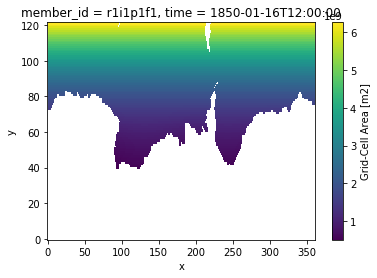

In [100]:
plt.rcParams['font.size'] = 10
area_ipsl.plot()

In [35]:
### Computed weighted area Southern Ocean CO2
cccma_fco2_SO = ((SO_slice_cccma_fgco2_ds.fgco2*area_cccma).sum(['j','i'])/area_cccma.sum(['j','i'])).compute()
ncc_fco2_SO = ((SO_slice_ncc_fgco2_ds.fgco2*area_ncc).sum(['j','i'])/area_ncc.sum(['j','i'])).compute()
ipsl_fco2_SO = ((SO_slice_ipsl_fgco2_ds.fgco2*area_ipsl).sum(['y','x'])/area_ipsl.sum(['y','x'])).compute()

cccma_fo2_SO = ((SO_slice_cccma_fgo2_ds.fgo2*area_cccma).sum(['j','i'])/area_cccma.sum(['j','i'])).compute()
ncc_fo2_SO = ((SO_slice_ncc_fgo2_ds.fgo2*area_ncc).sum(['j','i'])/area_ncc.sum(['j','i'])).compute()
ipsl_fo2_SO = ((SO_slice_ipsl_fgo2_ds.fgo2*area_ipsl).sum(['y','x'])/area_ipsl.sum(['y','x'])).compute()

In [93]:
# units = 60*60*24*1000*-1
seasonal_ipsl_fco2 = ipsl_fco2_SO[-120:].groupby('time.month').mean('time') #*units
seasonal_ncc_fco2 = ncc_fco2_SO[-120:].groupby('time.month').mean('time') #*units
seasonal_cccma_fco2 = cccma_fco2_SO[-120:].groupby('time.month').mean('time') #*units

seasonal_ipsl_fo2 = ipsl_fo2_SO[-120:].groupby('time.month').mean('time') #*units
seasonal_ncc_fo2 = ncc_fo2_SO[-120:].groupby('time.month').mean('time') #*units
seasonal_cccma_fo2 = cccma_fo2_SO[-120:].groupby('time.month').mean('time') #*units

def F_var_x_dupl(var_sc):
    ## duplicate the times axis in the seasonal cycle
    duplicated_sc = xr.concat([var_sc]*2, 'month')
    duplicated_sc['month'] = np.arange(24) + 1
    return duplicated_sc

seasonal_ipsl_fco2_dsc  = F_var_x_dupl(seasonal_ipsl_fco2)
seasonal_ncc_fco2_dsc  = F_var_x_dupl(seasonal_ncc_fco2)
seasonal_cccma_fco2_dsc  = F_var_x_dupl(seasonal_cccma_fco2)

seasonal_ipsl_fo2_dsc  = F_var_x_dupl(seasonal_ipsl_fo2)
seasonal_ncc_fo2_dsc  = F_var_x_dupl(seasonal_ncc_fo2)
seasonal_cccma_fo2_dsc  = F_var_x_dupl(seasonal_cccma_fo2)

In [106]:
SO_slice_cccma_fgco2_ds.units

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-106-8bace5539546>", line 1, in <module>
    SO_slice_cccma_fgco2_ds.units
  File "/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/core/common.py", line 228, in __getattr__
    "%r object has no attribute %r" % (type(self).__name__, name)
AttributeError: 'Dataset' object has no attribute 'units'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Trace

AttributeError: 'Dataset' object has no attribute 'units'

In [96]:
SO_slice_cccma_fgco2_ds.gr

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 92, time: 1500, vertices: 4)
Coordinates:
  * j                   (j) int32 1 2 3 4 5 6 7 8 9 ... 85 86 87 88 89 90 91 92
    member_id           <U8 'r1i1p1f1'
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
  * time                (time) object 1860-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: bnds, vertices
Data variables:
    depth               (j, i) float64 dask.array<chunksize=(92, 360), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(92, 360, 4), meta=np.ndarray>
    latitude            (j, i) float64 dask.array<chunksize=(92, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(92, 360, 4), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(92, 360), meta=np.ndarray>
    time_bnds           (time, bnds, j, i) object dask.array<chunksize=(120, 2, 92, 36

(24,)

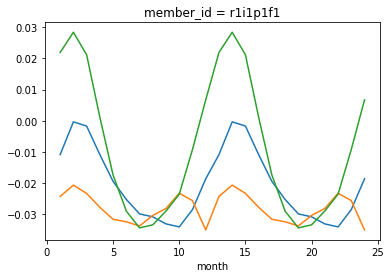

In [62]:
seasonal_ipsl_fco2_dsc.plot()
seasonal_ncc_fco2_dsc.plot()
seasonal_cccma_fco2_dsc.plot()
seasonal_ipsl_fco2_dsc.shape

In [ ]:
['NorESM2-LM', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'MIROC-ES2L', 'CanESM5']

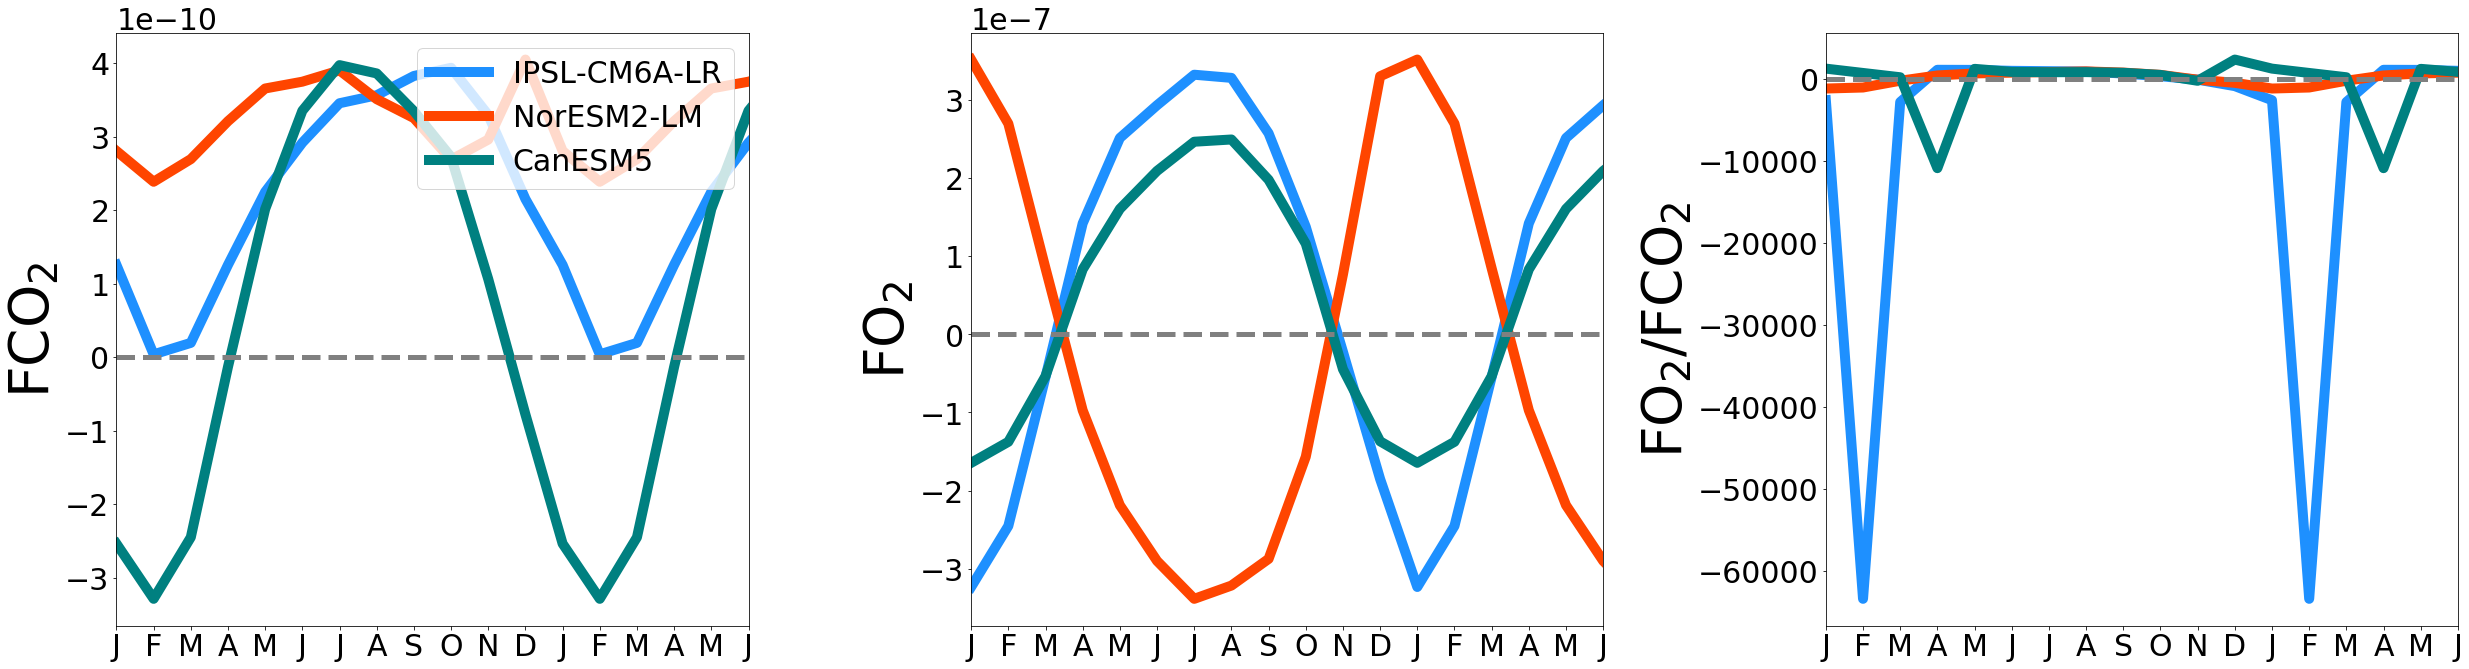

In [94]:
title_font = {'fontname':'Calibri (Body) ', 'size':'80', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}
my_xticks = ['J','F','M','A', 'M','J','J','A','S','O','N','D','J','F','M','A', 'M','J','J','A','S','O','N','D']
plt.figure(figsize=[35,10])
plt.rcParams['font.size'] = 30
plt.rcParams['lines.linewidth'] = 10
plt.rcParams['savefig.dpi'] = 200
units_cccma = 12.01/44.01
time = range(23)
ylfz= 55

lz = 5

time = range(24)


############
subplot(1,3,1)
plot(time,seasonal_ipsl_fco2_dsc,color = 'dodgerblue',label = 'IPSL-CM6A-LR')
plot(time,seasonal_ncc_fco2_dsc,color = 'orangered',label = 'NorESM2-LM')
plot(time,seasonal_cccma_fco2_dsc,color = 'teal',label = 'CanESM5')
# fill_between(time, np.mean(cmip5_ddic_saz_gdicd ,0) + np.std(cmip5_ddic_saz_gdicd,0) \
#              ,np.mean(cmip5_ddic_saz_gdicd,0) - np.std(cmip5_ddic_saz_gdicd,0),color = 'violet',alpha=0.5)
plt.xticks(time, my_xticks)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
# plt.ylim(-50,45)
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
plt.legend(loc = 1)
plt.ylabel('FCO$_2$',fontsize = ylfz)


subplot(1,3,2)
plot(time,seasonal_ipsl_fo2_dsc,color = 'dodgerblue',label = 'IPSL-CM6A-LR')
plot(time,seasonal_ncc_fo2_dsc,color = 'orangered',label = 'NorESM2-LM')
plot(time,seasonal_cccma_fo2_dsc,color = 'teal',label = 'CanESM5')
# fill_between(time, np.mean(cmip5_ddic_saz_gdicd ,0) + np.std(cmip5_ddic_saz_gdicd,0) \
#              ,np.mean(cmip5_ddic_saz_gdicd,0) - np.std(cmip5_ddic_saz_gdicd,0),color = 'violet',alpha=0.5)
plt.xticks(time, my_xticks)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
# plt.ylim(-50,45)
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
# plt.legend(loc = 9)
plt.ylabel('FO$_2$',fontsize = ylfz)

subplot(1,3,3)
plot(time,seasonal_ipsl_fo2_dsc/seasonal_ipsl_fco2_dsc,color = 'dodgerblue',label = 'IPSL-CM6A-LR')
plot(time,seasonal_ipsl_fo2_dsc/seasonal_ncc_fco2_dsc,color = 'orangered',label = 'NorESM2-LM')
plot(time,seasonal_ipsl_fo2_dsc/seasonal_cccma_fco2_dsc,color = 'teal',label = 'CanESM5')
# fill_between(time, np.mean(cmip5_ddic_saz_gdicd ,0) + np.std(cmip5_ddic_saz_gdicd,0) \
#              ,np.mean(cmip5_ddic_saz_gdicd,0) - np.std(cmip5_ddic_saz_gdicd,0),color = 'violet',alpha=0.5)
plt.xticks(time, my_xticks)
plot(time,np.transpose(np.zeros(len(time))),'--',linewidth = lz,color = 'grey')
# plt.legend(loc = 2)
# plt.ylim(-100,100)
plt.xlim(0,17)
# plt.title('Sub-Antarctic zone')
# plt.legend(loc = 9)
plt.ylabel('FO$_2$/FCO$_2$',fontsize = ylfz)

plt.tight_layout()

In [ ]:
ipsl_fco2_SO[-120:].stack

In [141]:
ipsl_fco2_SO['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')
np.reshape(ipsl_fco2_SO

(1980,)

In [151]:
stack?

Object `stack` not found.


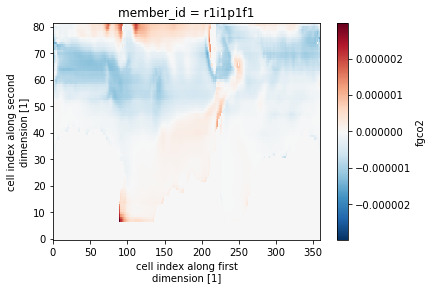

In [56]:
SO_fgco2 = c.fgco2.areacello.sum(['i', 'j'])/areacello
SO_fgco2.plot()

In [54]:
SO_slice_ds

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 82, time: 1980, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * time                (time) datetime64[ns] 1850-01-01 ... 2014-12-01
  * j                   (j) int32 0 1 2 3 4 5 6 7 8 ... 74 75 76 77 78 79 80 81
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    longitude           (j, i) float64 73.5 74.5 75.5 76.5 ... 70.5 71.5 72.5
    latitude            (j, i) float64 -78.39 -78.39 -78.39 ... -44.65 -44.65
    vertices_longitude  (j, i, vertices) float64 74.0 74.0 73.0 ... 72.0 72.0
    time_bnds           (time, bnds, j, i) object dask.array<chunksize=(1980, 2, 82, 360), meta=np.ndarray>
    depth               (j, i) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    vertices_latitude   (j, i, vertices) float64 -78.29 -78.49 ... -45.0 -44.29
    fgco2               (time, j, i) float32 dask.array<chunk

In [74]:
ds_cccma = dsets['fgco2']['CMIP.CCCma.CanESM5.historical.Omon.gn']

In [2]:
pwd

'/glade/u/home/pmongwe/cmip6hack-ocean-bgc'

In [194]:
# ds[lat_dict[k]]

'lat'

In [173]:
SO_slice = ds.where(ds[lat_dict[k]] <= -40, drop=True).squeeze()

In [80]:
SO_slice = ds_cccma.where(ds_cccma['latitude'] <= -44, drop=True).squeeze()  ## mask everything except south of 44oS

In [81]:
SO_fgco2 = SO_slice.sum(['i', 'j']).fgco2

In [87]:
SO_fgco2['time'] = np.arange('1850-01', '2015-01', dtype='datetime64')

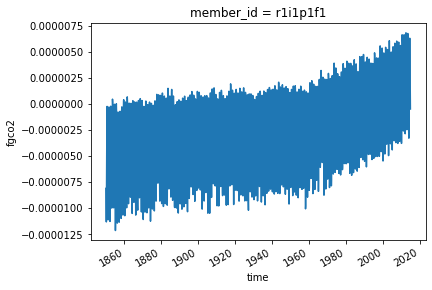

In [84]:
SO_fgco2.plot()

In [191]:
for k, v in dsets['fgco2'].items():
    print(k)
    # operations go here.

CMIP.CCCma.CanESM5.historical.Omon.gn
CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn
CMIP.NCC.NorESM2-LM.historical.Omon.gn


In [15]:
dsets['areacello'].keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Ofx.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Ofx.gn', 'CMIP.NCC.NorESM2-LM.historical.Ofx.gn'])

In [186]:
# Lists out variables
dsets.keys()


dict_keys(['fgo2', 'fgco2', 'tos', 'sos', 'areacello'])

In [134]:
# Lists out models for the given variable
dsets['fgco2'].keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Omon.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn', 'CMIP.NCC.NorESM2-LM.historical.Omon.gn'])

In [156]:
CCCma_fgco2 = dsets['fgco2']['CMIP.CCCma.CanESM5.historical.Omon.gn']
# CCCma_fgco2

/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


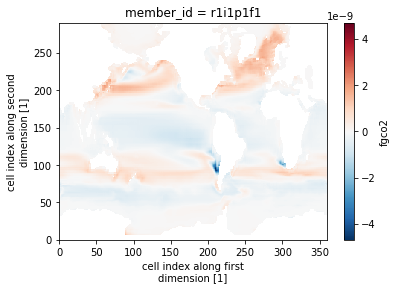

In [157]:
CCCma_fgco2['fgco2'].squeeze().mean('time').plot()

In [158]:
# CCCma_fgco2.sel(lon=180, lat=10.26,method='nearest').plot()

In [146]:
ds_CCCma_fgco2 = CCCma_fgco2['fgco2'][0,:,:,:]

/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


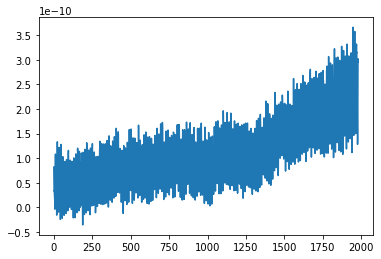

In [151]:
plt.plot(np.nanmean(np.nanmean(ds_CCCma_fgco2,2),1))

In [84]:

master_keys = dsets['fgo2'].keys()

for key in master_keys:
    ds = []
    for vkey in variables:
        ds.append(dsets[vkey][key])
    xr.merge(ds)

In [70]:
# filelist = cat.df.path.tolist()
# filelist

In [71]:
# for file in filelist:
#     ds = xr.open_dataset(file, chunks={'time': 10})
#     ds.attrs = {}
#     print(ds.coords)

In [120]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})

AttributeError: 'dict' object has no attribute 'to_dataset_dict'

In [59]:
dset_dict.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Omon.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn', 'CMIP.NCC.NorESM2-LM.historical.Omon.gn'])

In [40]:
dset_dict

{'CMIP.CCCma.CanESM5.historical.Omon.gn': <xarray.Dataset>
 Dimensions:             (bnds: 2, i: 360, j: 291, member_id: 1, time: 1980, vertices: 4)
 Coordinates:
   * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
   * time                (time) float64 15.5 45.0 74.5 ... 6.018e+04 6.021e+04
   * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
   * member_id           (member_id) <U8 'r1i1p1f1'
 Dimensions without coordinates: bnds, vertices
 Data variables:
     longitude           (j, i) float64 73.5 74.5 75.5 76.5 ... 72.95 72.96 72.99
     vertices_longitude  (j, i, vertices) float64 74.0 74.0 73.0 ... 72.95 73.0
     time_bnds           (time, bnds) float64 dask.array<chunksize=(1980, 2), meta=np.ndarray>
     latitude            (j, i) float64 -78.39 -78.39 -78.39 ... 50.23 50.01
     vertices_latitude   (j, i, vertices) float64 -78.29 -78.49 ... 50.11 50.11
     sos                 (member_id, time, j, i) float32 dask.arr